# Data Analysis Nanodegree Project :Wrangle and Analyze Data

The dataset that will be wrangled , analyzed and visualized is the tweet archive of WeRateDogs. WeRateDogs is a twitter account
that people rate their dogs. 


### Purpose of this analysis :

The purpose is to create analyses and visualizations as it is very basic information from twitter ,that need gathering,
then assessing and cleaning .

### Data wrangling, which consists of:

 - Gathering data
 - Assessing data
 - Cleaning data
 - Storing, analyzing, and visualizing our wrangled data
 - Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations

In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import seaborn as sns; sns.set()
import os
import tweepy
import json


## Gathering Data

In [2]:
#read twitter archive 
df_arch=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Download tweet image predictions programmatically using requests
req=requests.get( 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open ('image_predictions.tsv', mode='wb') as file:
    file.write(req.content)
image=pd.read_csv('image_predictions.tsv', sep='\t')    

Ref: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [4]:
# Twitter API
consumer_key = '5Uur0mo4ol2kB8yhtZ1VxXS0u'
consumer_secret = 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH'
access_token = '303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB'
access_secret = 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [5]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in df_arch['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 75
Rate limit reached. Sleeping for: 818
Rate limit reached. Sleeping for: 817
Rate limit reached. Sleeping for: 737


In [6]:
#Printing 
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of tweets no found 25


In [7]:

#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [8]:
#we write this list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [9]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])


In [10]:
# saving the dataFrame to file
tweet_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)


In [11]:
# Read the saved tweet_json.txt file into a dataframe
df_tweet_json = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [12]:
df_tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35143,7409,8953164,18,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30405,5515,8953164,18,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22863,3639,8953164,18,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38415,7587,8953164,18,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36666,8158,8953164,18,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [13]:
df_tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35143,7409,8953164,18,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30405,5515,8953164,18,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22863,3639,8953164,18,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38415,7587,8953164,18,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36666,8158,8953164,18,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18487,2739,8953164,18,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10749,1772,8953164,18,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,59152,16578,8953165,18,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25440,3788,8953165,18,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29056,6425,8953165,18,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


## Accessing Data

In [14]:
df_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
image.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35143,7409,8953164,18,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30405,5515,8953164,18,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22863,3639,8953164,18,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38415,7587,8953164,18,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36666,8158,8953164,18,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18487,2739,8953164,18,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10749,1772,8953164,18,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,59152,16578,8953165,18,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25440,3788,8953165,18,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29056,6425,8953165,18,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In [19]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


### Quality 
- Delete tweets' replies columns from df_arch table
- Drop columns similar kind of values as user_favourite in tweet_json table
- Rename columns p1,p2,p3
- Convert None values to NaN
- Correct all datatypes by changing the datatypes of the columns
- Handling missing data
- Clean source column to be readable
- Handling rating denominator issue 

### Tidiness
- Combine doggo, floofer, pupper and puppo into one column
- Compining p1, p2 and p3 columns 
- Combine three tables in one master dataframe

## Cleaning Data

In [20]:
# copy of dataframes
df_clean=df_arch.copy()
image_clean=image.copy()
tweet_clean=tweet_json.copy()

### Define
Delete tweets replies column in df_arch

### Code

In [21]:
df_clean=df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],1)

### Test

In [22]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define 
Delete user_favourite column in tweet_clean table

### Code

In [23]:
tweet_clean=tweet_clean.drop(['friends_count'],1)

In [24]:
tweet_clean.head()

,tweet_id,favorite_count,retweet_count,followers_count,source,retweeted_status,url
0,892420643555336193,35143,7409,8953164,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30405,5515,8953164,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22863,3639,8953164,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38415,7587,8953164,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36666,8158,8953164,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


### Define
Rename column names p1,p2,p3 

### Code

In [25]:
image_clean.rename(columns={'p1': 'Prediction1', 'p2': 'Prediction2', 'p3': 'Prediction3'}, inplace=True)

### Test

In [26]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id       2075 non-null int64
jpg_url        2075 non-null object
img_num        2075 non-null int64
Prediction1    2075 non-null object
p1_conf        2075 non-null float64
p1_dog         2075 non-null bool
Prediction2    2075 non-null object
p2_conf        2075 non-null float64
p2_dog         2075 non-null bool
Prediction3    2075 non-null object
p3_conf        2075 non-null float64
p3_dog         2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Define 
Combine doggo, floofer, pupper and puppo into one column

### Code

In [27]:
df_clean['doggo'].replace({"None":""},inplace=True)


In [28]:
df_clean['doggo']

0            
1            
2            
3            
4            
5            
6            
7            
8            
9       doggo
10           
11           
12           
13           
14           
15           
16           
17           
18           
19           
20           
21           
22           
23           
24           
25           
26           
27           
28           
29           
        ...  
2326         
2327         
2328         
2329         
2330         
2331         
2332         
2333         
2334         
2335         
2336         
2337         
2338         
2339         
2340         
2341         
2342         
2343         
2344         
2345         
2346         
2347         
2348         
2349         
2350         
2351         
2352         
2353         
2354         
2355         
Name: doggo, Length: 2356, dtype: object

In [29]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,None,None,None


In [30]:
df_clean['floofer'].replace({"None":""},inplace=True)

In [31]:
df_clean['pupper'].replace({"None":""},inplace=True)

In [32]:
df_clean['puppo'].replace({"None":""},inplace=True)

In [33]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


In [34]:
dog_stage=df_clean["doggo"]+df_clean["floofer"]+df_clean["pupper"]+df_clean["puppo"]
df_clean['dog_stage']=dog_stage

In [35]:
df_clean["dog_stage"]
df_clean["dog_stage"] = df_clean["dog_stage"].str.strip()
#df_clean=df_clean.drop(['doggo','floofer','pupper','puppo'],1)
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,


In [36]:
df_clean['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

### Define
correct all datatypes by changing the datatypes of the columns

### code

In [37]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
df_clean['timestamp'] = pd.to_datetime(df_clean.timestamp)
df_clean['life_stage'] = df_clean['dog_stage'].astype('category')

### Test


In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dog_stage             2356 non-null object
life_stage            2356 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(10)
memory usage: 242.0+ KB


### Define
Compining p1, p2 and p3 columns in image table

### Code

In [39]:
prediction = []
def get_prediction(dataframe):
    if dataframe['p1_dog'] == True and dataframe['p1_conf']>dataframe['p2_conf'] and dataframe['p1_conf']>dataframe['p3_conf']:
        prediction.append(dataframe['Prediction1'])
    elif dataframe['p2_dog'] == True and dataframe['p2_conf']>dataframe['p1_conf'] and dataframe['p2_conf']>dataframe['p3_conf']:
        prediction.append(dataframe['Prediction2'])
    elif dataframe['p3_dog'] == True and dataframe['p3_conf']>dataframe['p1_conf'] and dataframe['p3_conf']>dataframe['p2_conf']:
        prediction.append(dataframe['Prediction3'])
    else:
        prediction.append('NaN')
    

image_clean.apply(get_prediction, axis=1)
image_clean['prediction'] = prediction

### Test

In [40]:
#delete unuseful columns
image_clean=image_clean.drop(['Prediction1','Prediction2','Prediction3','p1_dog','p2_dog','p3_dog','p1_conf','p2_conf','p3_conf'],1)

### Define 
Convert None values to NaN in image table

### Code

In [41]:
image_clean['prediction'].replace({"NaN":"None"},inplace=True)

### Test

In [42]:
image_clean

,tweet_id,jpg_url,img_num,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,None
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,None
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle


In [43]:
df_clean['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [44]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,life_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,,
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,,,,
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,,
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,,,,,,
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,,
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,doggo,doggo


### Define 
Combine three tables in one master dataframe

### Code

In [45]:
image_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

In [46]:
twitterdata_master = pd.merge(left=df_clean,
                                 right=tweet_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
twitterdata_master = twitterdata_master.merge(image_clean, on='tweet_id', how='inner')


In [47]:
twitterdata_master.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,life_stage,favorite_count,retweet_count,followers_count,source_y,retweeted_status,url,jpg_url,img_num,prediction
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,...,,35143,7409,8953164,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,...,,30405,5515,8953164,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,...,,22863,3639,8953164,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,...,,38415,7587,8953164,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,...,,36666,8158,8953164,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


## Store in CSV files

In [48]:
twitterdata_master.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

twitterdata_master.head(10)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,life_stage,favorite_count,retweet_count,followers_count,source_y,retweeted_status,url,jpg_url,img_num,prediction
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,...,,35143,7409,8953164,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,...,,30405,5515,8953164,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,...,,22863,3639,8953164,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,...,,38415,7587,8953164,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,...,,36666,8158,8953164,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,...,,18487,2739,8953164,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,...,,10749,1772,8953164,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,,,...,,59152,16578,8953165,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,...,,25440,3788,8953165,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,...,doggo,29056,6425,8953165,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle


In [49]:
twitterdata_master=twitterdata_master.drop(['life_stage'],1)

### Define
Handling missing data in dog_stage

### Code

In [50]:
twitterdata_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2049
Data columns (total 22 columns):
tweet_id              2050 non-null object
timestamp             2050 non-null datetime64[ns]
source_x              2050 non-null object
text                  2050 non-null object
expanded_urls         1994 non-null object
rating_numerator      2050 non-null int64
rating_denominator    2050 non-null int64
name                  2050 non-null object
doggo                 2050 non-null object
floofer               2050 non-null object
pupper                2050 non-null object
puppo                 2050 non-null object
dog_stage             2050 non-null object
favorite_count        2050 non-null int64
retweet_count         2050 non-null int64
followers_count       2050 non-null int64
source_y              2050 non-null object
retweeted_status      2050 non-null object
url                   2050 non-null object
jpg_url               2050 non-null object
img_num               2050 non

In [51]:
twitterdata_master['dog_stage']=twitterdata_master['dog_stage'].replace(r'^\s*$', np.nan, regex=True)

In [52]:
twitterdata_master['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

### Test

In [53]:
twitterdata_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2049
Data columns (total 22 columns):
tweet_id              2050 non-null object
timestamp             2050 non-null datetime64[ns]
source_x              2050 non-null object
text                  2050 non-null object
expanded_urls         1994 non-null object
rating_numerator      2050 non-null int64
rating_denominator    2050 non-null int64
name                  2050 non-null object
doggo                 2050 non-null object
floofer               2050 non-null object
pupper                2050 non-null object
puppo                 2050 non-null object
dog_stage             375 non-null object
favorite_count        2050 non-null int64
retweet_count         2050 non-null int64
followers_count       2050 non-null int64
source_y              2050 non-null object
retweeted_status      2050 non-null object
url                   2050 non-null object
jpg_url               2050 non-null object
img_num               2050 non-

### Define
Clean source column to be readable

### Code

In [54]:
twitterdata_master['source_x'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [55]:
#import re
import re
twitterdata_master['source_x'] = twitterdata_master['source_x'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

### Test

In [56]:
twitterdata_master['source_x'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [57]:
twitterdata_master['dog_stage']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9        doggo
10         NaN
11         NaN
12       puppo
13         NaN
14       puppo
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28      pupper
29         NaN
         ...  
2020       NaN
2021       NaN
2022       NaN
2023       NaN
2024       NaN
2025       NaN
2026       NaN
2027       NaN
2028       NaN
2029       NaN
2030       NaN
2031       NaN
2032       NaN
2033       NaN
2034       NaN
2035       NaN
2036       NaN
2037       NaN
2038       NaN
2039       NaN
2040       NaN
2041       NaN
2042       NaN
2043       NaN
2044       NaN
2045       NaN
2046       NaN
2047       NaN
2048       NaN
2049       NaN
Name: dog_stage, Length: 2050, dtype: object

In [58]:
twitterdata_master[['rating_numerator','rating_denominator']].tail(1025)

,rating_numerator,rating_denominator
1025,12,10
1026,10,10
1027,11,10
1028,10,10
1029,14,10
1030,12,10
1031,11,10
1032,12,10
1033,8,10
1034,10,10


### Define 
Rating denominator issue that not equal 10

### Code

In [59]:
#Remove zero denominator
twitterdata_master = twitterdata_master[twitterdata_master['rating_denominator'] > 0]
# Must return zero
len(twitterdata_master[twitterdata_master['rating_denominator'] <= 0])

0

In [60]:
#normalized rating
twitterdata_master['rating'] = twitterdata_master['rating_numerator'] /twitterdata_master['rating_denominator']

### Test

In [61]:
twitterdata_master[['tweet_id', 'rating_numerator', 'rating_denominator', 'rating']]

,tweet_id,rating_numerator,rating_denominator,rating
0,892420643555336193,13,10,1.3
1,892177421306343426,13,10,1.3
2,891815181378084864,12,10,1.2
3,891689557279858688,13,10,1.3
4,891327558926688256,12,10,1.2
5,891087950875897856,13,10,1.3
6,890971913173991426,13,10,1.3
7,890729181411237888,13,10,1.3
8,890609185150312448,13,10,1.3
9,890240255349198849,14,10,1.4


In [62]:
#drop colums 
twitterdata_master=twitterdata_master.drop(['doggo','floofer','pupper','puppo'],1)
twitterdata_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2049
Data columns (total 19 columns):
tweet_id              2049 non-null object
timestamp             2049 non-null datetime64[ns]
source_x              2049 non-null object
text                  2049 non-null object
expanded_urls         1994 non-null object
rating_numerator      2049 non-null int64
rating_denominator    2049 non-null int64
name                  2049 non-null object
dog_stage             375 non-null object
favorite_count        2049 non-null int64
retweet_count         2049 non-null int64
followers_count       2049 non-null int64
source_y              2049 non-null object
retweeted_status      2049 non-null object
url                   2049 non-null object
jpg_url               2049 non-null object
img_num               2049 non-null int64
prediction            2049 non-null object
rating                2049 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(6), object(11)
memory usage: 

## Storing and saving

In [63]:
twitterdata_master.to_csv('twitter_archive_master.csv', index=False)

## Insights and Visualization

In [64]:
df = pd.read_csv('twitter_archive_master.csv')

# Create year month for trending
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year-month'] = df['timestamp'].map(lambda x: str(x.year) + '-' + str(x.month).zfill(2))

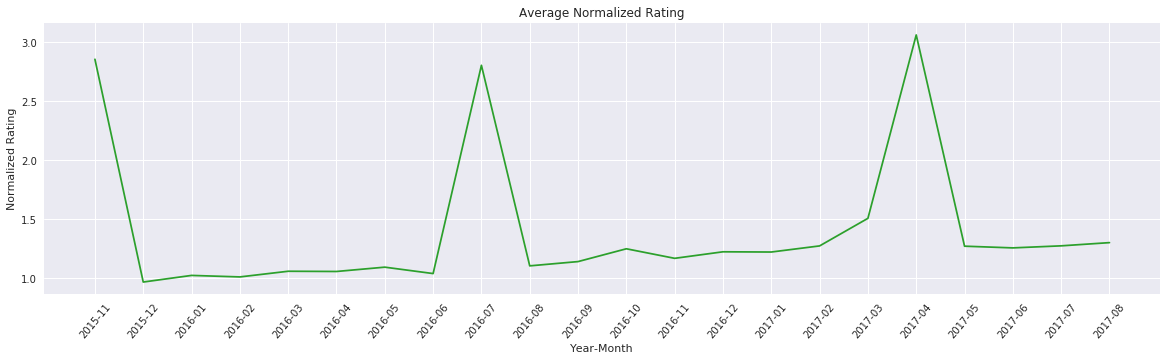

In [84]:
count=df.groupby('year-month')[['rating']].mean().reset_index()
plt.plot(list(count['year-month']), list(count['rating']), color="tab:green")
plt.xlabel('Year-Month') 
plt.ylabel('Normalized Rating') 
plt.title('Average Normalized Rating')
plt.xticks(rotation=50)
plt.rcParams["figure.figsize"] = (20,4);

Text(0.5,1,'Average Normalized Rating Grouped by dog_stage')

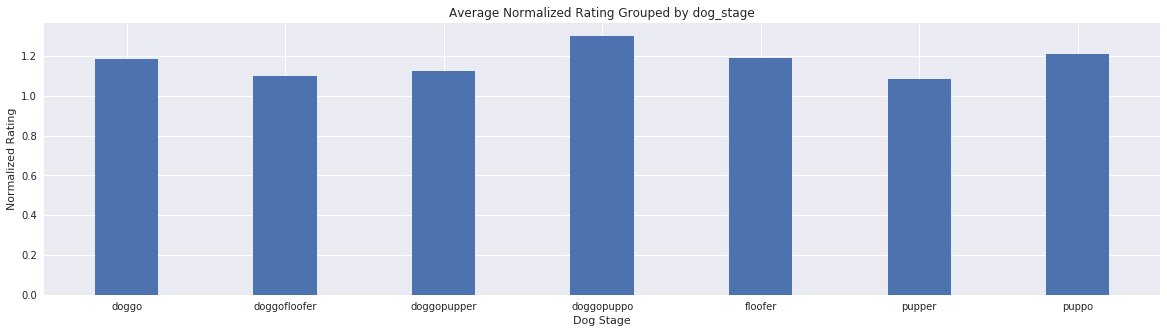

In [66]:
avg_rating=df.groupby('dog_stage')[['rating']].mean().reset_index()
loc = np.arange(len(avg_rating['dog_stage'])) * 2
plt.bar(loc, avg_rating['rating'])
plt.xlabel('Dog Stage')
plt.xticks(loc,avg_rating['dog_stage']) 
plt.ylabel('Normalized Rating') 
plt.title('Average Normalized Rating Grouped by dog_stage')


Text(0.5,1,'Retweets and favorites Scatter plot')

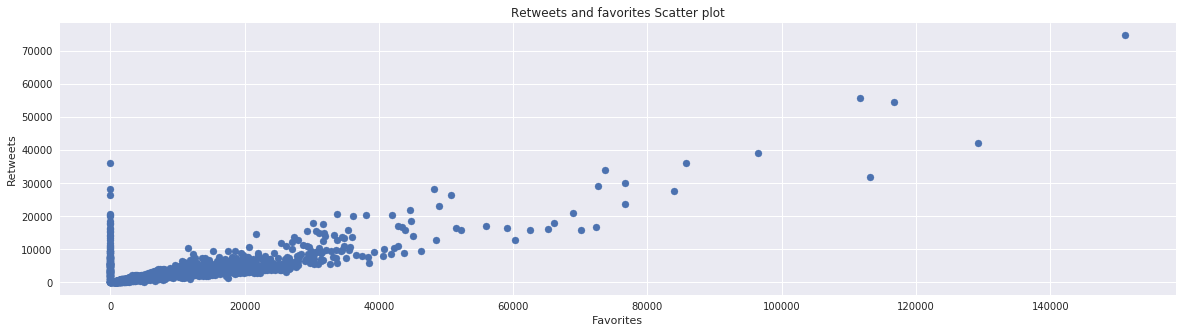

In [67]:
#plot the retweets and favourites
plt.scatter(twitterdata_master['favorite_count'],twitterdata_master['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

##### There is a positive  correlation between favorite count and retweet count 

Text(0.5,1,'Average Retweet count Grouped by source')

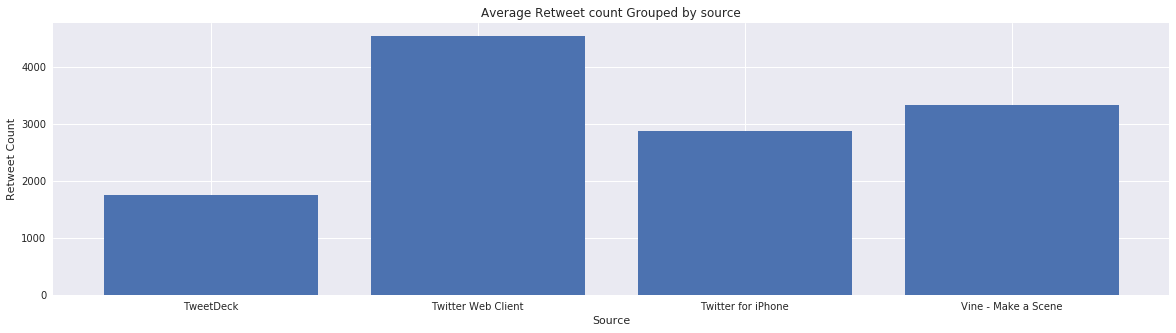

In [83]:
avg_retweetcount=df.groupby('source_x')[['retweet_count']].mean().reset_index()
loc = np.arange(len(avg_retweetcount['source_x'])) * 1
plt.bar(loc,avg_retweetcount['retweet_count'])
plt.xlabel('Source')
plt.xticks(loc,avg_retweetcount['source_x']) 
plt.ylabel('Retweet Count') 
plt.title('Average Retweet count Grouped by source')


#####  The twitter Web Client is the highest retweet  count in the all sources 

Text(0.5,1,'Retweets and User follower Scatter plot')

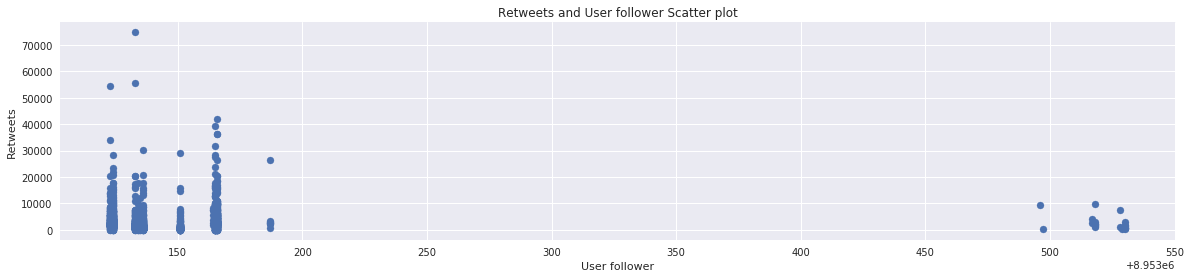

In [86]:
#plot the retweets and favourites
plt.scatter(twitterdata_master['followers_count'],twitterdata_master['retweet_count'])
plt.xlabel('User follower')
plt.ylabel('Retweets')
plt.title('Retweets and User follower Scatter plot')

##### Negative correlation between user followers and retweets, this is not expected.

(-1.2881368766222101,
 1.2384153542418819,
 -1.2112825963875589,
 1.2094997106114467)

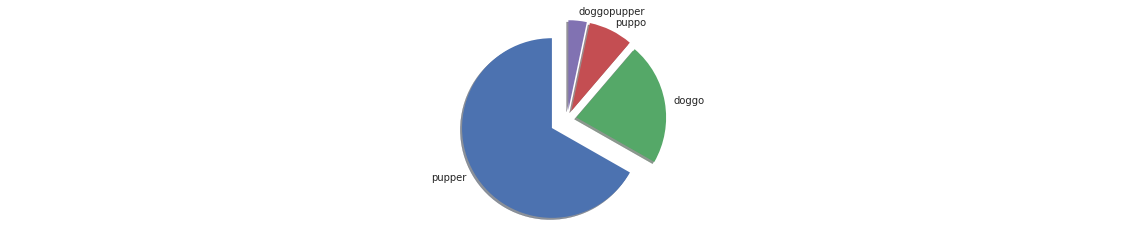

In [90]:
life_stage_count = list(twitterdata_master[twitterdata_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
life_stages = twitterdata_master[twitterdata_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
 

figure, axis = plt.subplots()
axis.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis.axis('equal')

##### Dogs in pupper takes the highest tweets 